## Load Detection Results

In [1]:
import pandas as pd

df = pd.read_parquet('yolov8n_detection_results.parquet')

In [2]:
df

,filename,id,det_boxes,det_conf,det_category_id
0,000000231538.jpg,231538,"[[369.12, 374.82, 94.64, 367.55], [275.72, 360...","[0.8767, 0.8523, 0.7863, 0.7315, 0.6548, 0.618...","[0, 0, 0, 28, 0, 24, 28, 0, 28]"
1,000000322749.jpg,322749,"[[194.15, 80.24, 183.24, 151.9], [582.14, 249....","[0.7612, 0.7044, 0.5148, 0.4506, 0.4182, 0.326...","[50, 50, 51, 50, 50, 51, 51]"
2,000000318299.jpg,318299,"[[458.6, 221.3, 362.52, 239.65], [178.15, 203....","[0.9268, 0.8947, 0.2532]","[7, 7, 7]"
3,000000025290.jpg,25290,"[[460.87, 165.48, 334.83, 326.56], [540.66, 33...","[0.9171, 0.8854]","[0, 36]"
4,000000020276.jpg,20276,"[[292.33, 211.56, 211.44, 191.84], [177.89, 30...","[0.8757, 0.8557]","[0, 37]"
...,...,...,...,...,...
24995,000000465301.jpg,465301,"[[283.26, 280.91, 88.91, 123.57], [69.65, 300....","[0.8988, 0.8958, 0.7998, 0.5443, 0.5305, 0.394...","[56, 57, 56, 56, 69, 56, 60, 72, 68, 56]"
24996,000000281503.jpg,281503,"[[345.71, 114.32, 68.75, 142.11], [240.0, 237....","[0.9087, 0.8906, 0.88, 0.8417, 0.7915, 0.6311,...","[0, 0, 32, 0, 0, 0, 34, 0, 34, 0]"
24997,000000260893.jpg,260893,"[[157.85, 202.96, 161.85, 312.32], [182.92, 19...","[0.9464, 0.464]","[76, 76]"
24998,000000405192.jpg,405192,"[[179.49, 475.72, 355.93, 328.03], [387.29, 44...","[0.9233, 0.8982, 0.8885, 0.8275, 0.7691, 0.658...","[53, 42, 0, 60, 0, 40, 53, 56, 41]"


## Flatten Detection Results
One row should correspond to one detection result.

> Note: The bounding box format is `center_x`, `center_y`, `width`, `height`.

In [3]:
df = df.apply(pd.Series.explode)
df.rename(columns={'id': 'image_id'}, inplace=True)
df

,filename,image_id,det_boxes,det_conf,det_category_id
0,000000231538.jpg,231538,"[369.12, 374.82, 94.64, 367.55]",0.8767,0
0,000000231538.jpg,231538,"[275.72, 360.12, 117.38, 313.49]",0.8523,0
0,000000231538.jpg,231538,"[144.19, 267.04, 30.54, 96.76]",0.7863,0
0,000000231538.jpg,231538,"[286.19, 538.9, 123.33, 85.47]",0.7315,28
0,000000231538.jpg,231538,"[183.74, 267.33, 36.12, 87.47]",0.6548,0
...,...,...,...,...,...
24998,000000405192.jpg,405192,"[15.07, 129.98, 29.19, 96.38]",0.3898,41
24999,000000381107.jpg,381107,"[432.39, 231.44, 414.93, 125.07]",0.8398,4
24999,000000381107.jpg,381107,"[302.03, 264.08, 80.88, 35.86]",0.7155,7
24999,000000381107.jpg,381107,"[82.82, 239.59, 37.51, 12.37]",0.5497,4


As a sanity check let's plot one of the rows.

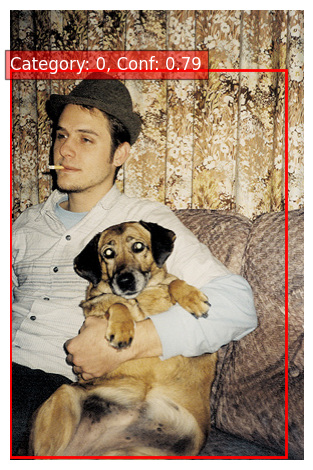

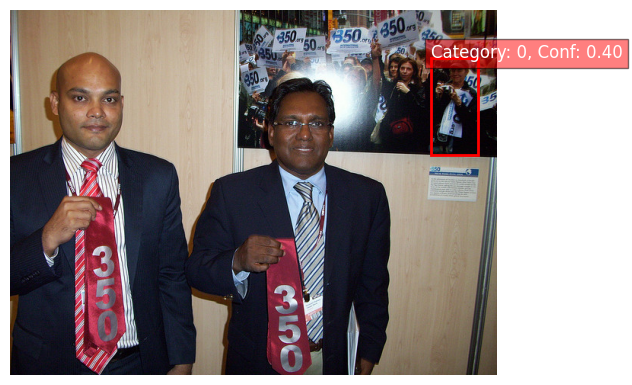

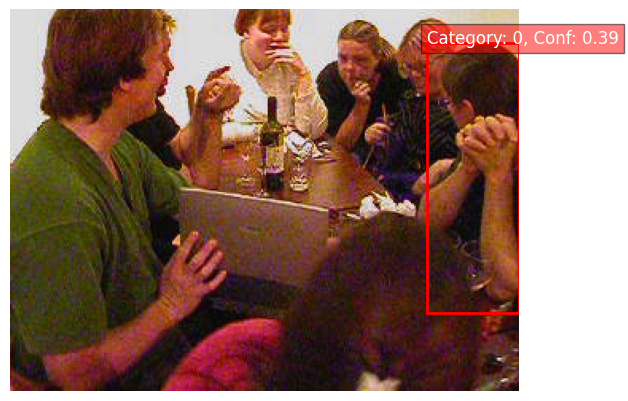

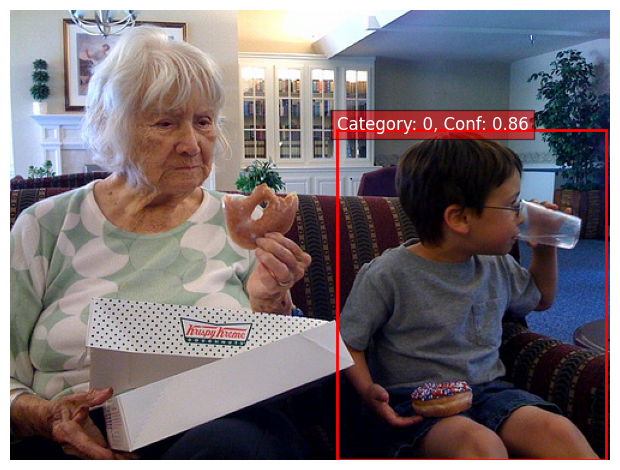

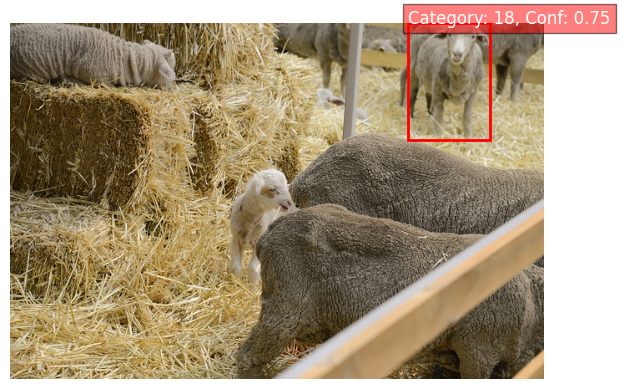

In [18]:
folder_path = '/workspace/datasets/coco_minitrain_25k/images/train2017/'

for row in df.sample(5).itertuples():
    image_path = os.path.join(folder_path, row.filename)
    image = Image.open(image_path)

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    center_x, center_y, width, height = row.det_boxes
    x1 = center_x - width / 2
    y1 = center_y - height / 2
    x2 = center_x + width / 2
    y2 = center_y + height / 2

    rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    label = f"Category: {row.det_category_id}, Conf: {row.det_conf:.2f}"
    ax.text(x1, y1, label, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    ax.axis('off')
    plt.tight_layout()
    plt.show()
